# Student Depression Indicator 

* Understanding the problem statement.

* Data Colletion

* EDA

* Data Preprocessing and Model Training

* Choose best model

# 1) Problem Statement 

* 1)- Predict student depression risk using academic, behavioral, and demographic factors to enable early intervention and support.

# 2) Data Collection

* Data Source = https://www.kaggle.com/datasets/hopesb/student-depression-dataset

# 3) About Data 

* ID: Unique identifier for each student.

* Age: Age of the student.

* Gender: Gender (e.g., Male, Female).

* City: Geographic region 

* CGPA: Grade Point Average or other academic scores.

* Sleep Duration: Average daily sleep duration.

* Profession

* Academic Pressure 

* Work Pressure 

# 4) Import Data & Required Packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  

In [2]:
data=pd.read_csv("Student Depression Dataset.csv")
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [3]:
# shape of the data 
data.shape

(27901, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [5]:
data.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

#### Since there are only three null values in our dataset which is very low compared to whole datset so we will drop it.

In [7]:
print(f"null precentage in the dataset {(3/27901)*100:.2f}%")

null precentage in the dataset 0.01%


In [8]:
data.dropna(inplace=True)

In [9]:
data.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

#### Based on domain knowledge we can drop some features which will not contribute much in our label those are 
#### id , city 

In [11]:
data.drop(columns=["id","City"],inplace=True) 

In [12]:
# checking for duplicates 
data.duplicated().sum()

0

# Stats Info

In [14]:
data.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000
mean,25.822174,3.141336,0.000430,7.656160,2.943974,0.000681,7.156570,3.139867,0.585526
std,4.905651,1.381462,0.043994,1.470708,1.361122,0.044397,3.707598,1.437347,0.492640
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


* Insights- Above we can see in age columns more people are from young age less than 30 and max value is too far from median it meanns data is right skewed.

* In cgpa min value is far from median it means data is left skewed.

* The high standard deviation (3.71) suggests variation in time spent on work/study across individuals.

In [18]:
## stats info of categorical data.
data.describe(include="O").T

,count,unique,top,freq
Gender,27898,2,Male,15546
Profession,27898,14,Student,27867
Sleep Duration,27898,5,Less than 5 hours,8309
Dietary Habits,27898,4,Unhealthy,10316
Degree,27898,28,Class 12,6080
Have you ever had suicidal thoughts ?,27898,2,Yes,17656
Family History of Mental Illness,27898,2,No,14397


## Note: As we can see there are other profession too in our Profession column as we are building this model for only students we will drop those values.After dropping those value we will left with only student profession so we can drop this column too.

In [20]:
data=data[data["Profession"]=="Student"]

In [21]:
# checking data shape
data.shape

(27867, 16)

In [22]:
data.drop(columns=["Profession"],inplace=True)

## Chceking unique values for each columns 

In [32]:
for col in data.columns:
    print(f"unique values in {col} -> {data[col].unique()}")
    print("\n")

unique values in Gender -> ['Male' 'Female']


unique values in Age -> [33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]


unique values in Academic Pressure -> [5. 2. 3. 4. 1. 0.]


unique values in Work Pressure -> [0. 5. 2.]


unique values in CGPA -> [ 8.97    5.9     7.03    5.59    8.13    5.7     9.54    8.04    9.79
  8.38    6.1     7.04    8.52    5.64    8.58    6.51    7.25    7.83
  9.93    8.74    6.73    5.57    8.59    7.1     6.08    5.74    9.86
  6.7     6.21    5.87    6.37    9.72    5.88    9.56    6.99    5.24
  9.21    7.85    6.95    5.86    7.92    9.66    8.94    9.71    7.87
  5.6     7.9     5.46    6.79    8.7     7.38    8.5     7.09    9.82
  8.89    7.94    9.11    6.75    7.53    9.49    9.01    7.64    5.27
  6.      9.44    5.75    7.51    9.05    6.38    8.95    9.88    5.32
  6.27    7.7     8.1     9.59    8.96    5.51    7.43    8.79    9.95
  5.37    6.86   

## Note:- As we are seeing multiple values in Degree section that we will have to encode during model building but for giving more underestandiblity 
## i am going to map these values for easy encoding in data preprocessing step.

#### Above we can all unique vaues are fine.

In [42]:
data.head()

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


# 5) Visulisation

## 5.1)-Univariate Analysis

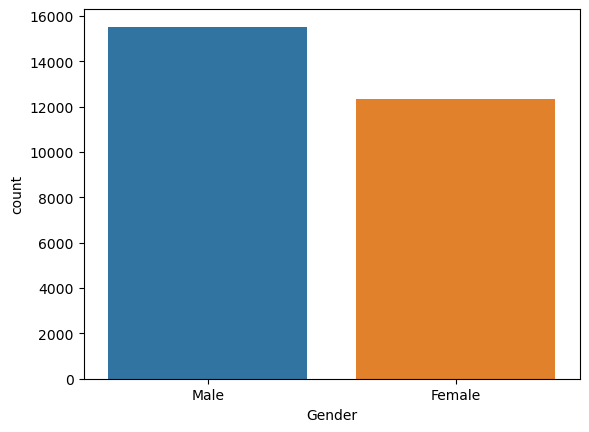

In [47]:
sns.countplot(x="Gender",data=data,hue="Gender")
plt.show()

Observation:
* We have more number of males tha female in dataset.

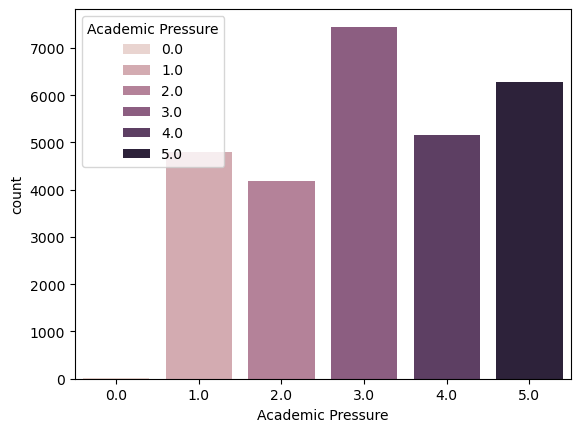

In [49]:
sns.countplot(x="Academic Pressure",data=data,hue="Academic Pressure")
plt.show()

* Observation
The category 3.0 appears most frequently

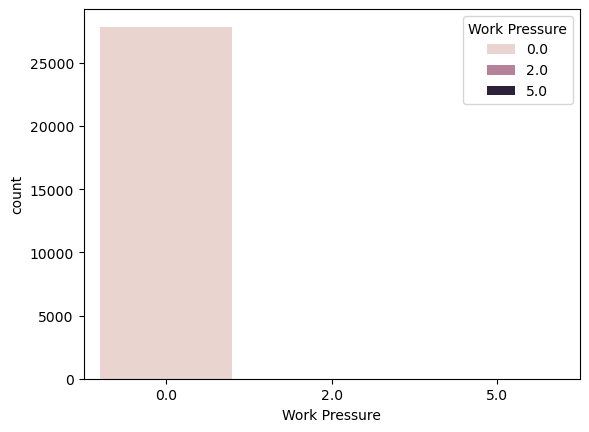

In [53]:
sns.countplot(x="Work Pressure",data=data,hue="Work Pressure")
plt.show()

In [54]:
data[data["Work Pressure"]!=0.0]

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
4365,Male,38.0,0.0,5.0,0.0,0.0,4.0,5-6 hours,Healthy,Class 12,No,2.0,3.0,No,0
14855,Male,21.0,0.0,2.0,0.0,0.0,1.0,7-8 hours,Moderate,Class 12,Yes,3.0,3.0,Yes,0
25746,Male,18.0,0.0,5.0,0.0,0.0,4.0,7-8 hours,Moderate,Class 12,Yes,9.0,4.0,No,1


* Observation
Most of the students are non working person.Very very less are working too.

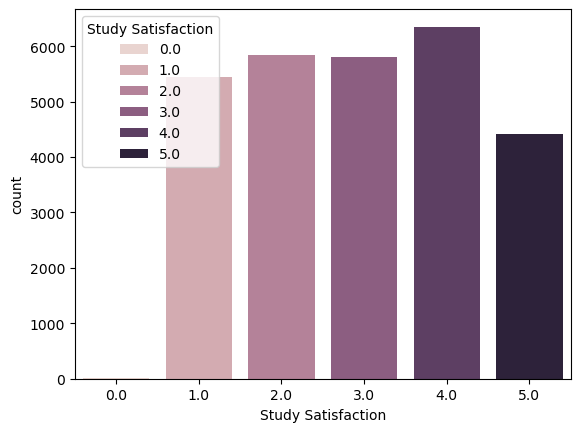

In [58]:
sns.countplot(x="Study Satisfaction",data=data,hue="Study Satisfaction")
plt.show()

Observation
* Very few students are fully satisfied with their study.

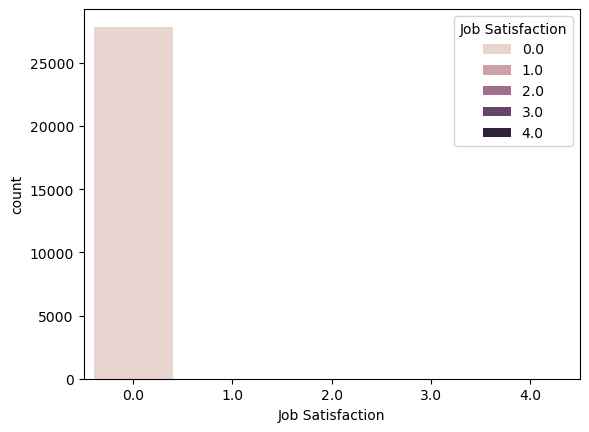

In [61]:
sns.countplot(x="Job Satisfaction",data=data,hue="Job Satisfaction")
plt.show()

Observation-
Most of the values in job satisfaction are 0.

In [64]:
data[data["Job Satisfaction"]!=0.0]

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
292,Male,29.0,3.0,0.0,9.63,3.0,3.0,7-8 hours,Moderate,M.Pharm,No,8.0,5.0,No,0
4365,Male,38.0,0.0,5.0,0.00,0.0,4.0,5-6 hours,Healthy,Class 12,No,2.0,3.0,No,0
13909,Female,20.0,0.0,0.0,0.00,0.0,2.0,Less than 5 hours,Moderate,Class 12,Yes,12.0,3.0,Yes,1
14855,Male,21.0,0.0,2.0,0.00,0.0,1.0,7-8 hours,Moderate,Class 12,Yes,3.0,3.0,Yes,0
20913,Male,18.0,0.0,0.0,0.00,0.0,1.0,Less than 5 hours,Moderate,Class 12,Yes,9.0,5.0,No,1
23141,Male,25.0,4.0,0.0,9.44,5.0,2.0,Less than 5 hours,Unhealthy,PhD,Yes,4.0,1.0,No,1
25746,Male,18.0,0.0,5.0,0.00,0.0,4.0,7-8 hours,Moderate,Class 12,Yes,9.0,4.0,No,1
26719,Female,24.0,0.0,0.0,0.00,0.0,2.0,More than 8 hours,Unhealthy,Class 12,No,0.0,5.0,No,0


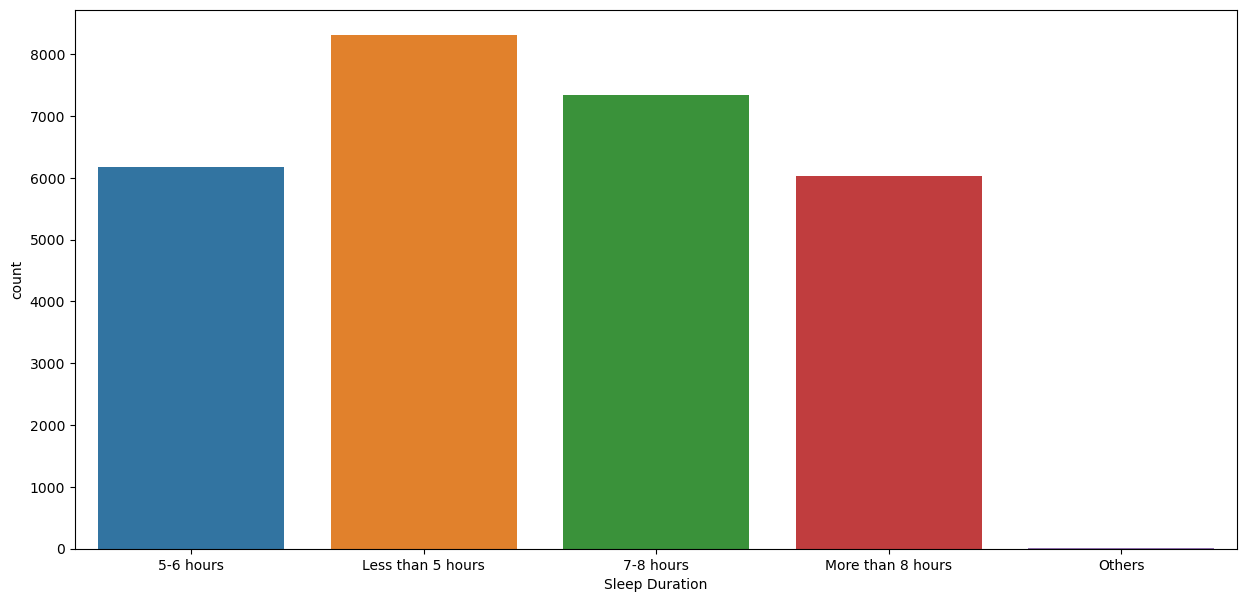

In [66]:
plt.figure(figsize=(15,7))
sns.countplot(x="Sleep Duration",data=data,hue="Sleep Duration")
plt.show()

* Observation- There are more people in our dataset who sleep less than 5 hours after that those people are there who sleep 7-8 hour.
* The number of people taking 5-6 hour of sleep and more than 8 hours are approx same.
* There are some people whose sleep duration is not known.

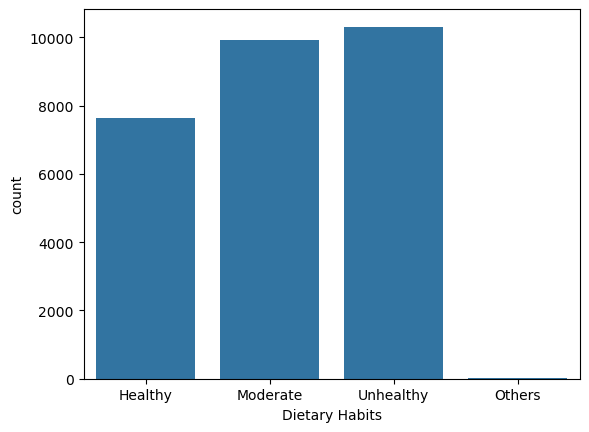

In [68]:
sns.countplot(x="Dietary Habits",data=data)
plt.show()

* Observation--
* Very less people take Healthy diet.
* Most of the people are taking Unhealthy and Moderate Diet.

### We will plot countplot for Degree column after maping these values.

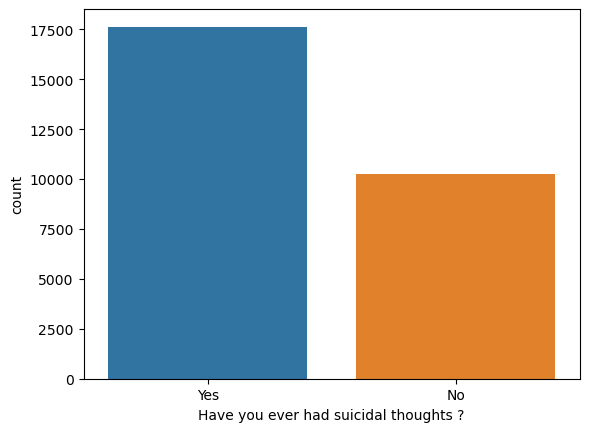

In [73]:
sns.countplot(x="Have you ever had suicidal thoughts ?",data=data,hue="Have you ever had suicidal thoughts ?")
plt.show()

 Obserbation --
* Most of the students have thought suscide once in their life.

In [76]:
data.head(2)

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0


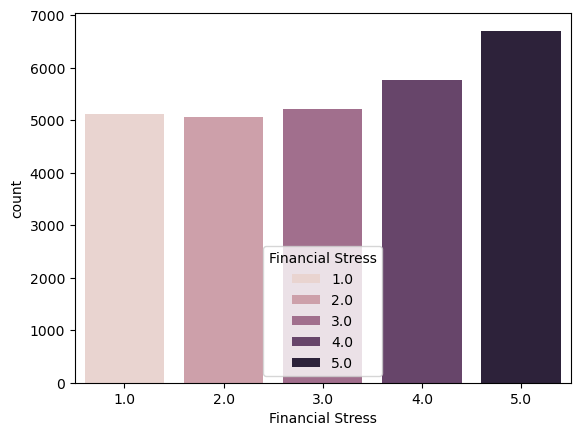

In [78]:
sns.countplot(x="Financial Stress",data=data,hue="Financial Stress")
plt.show()

* Observation
Most of the students are not financially strong in datset.

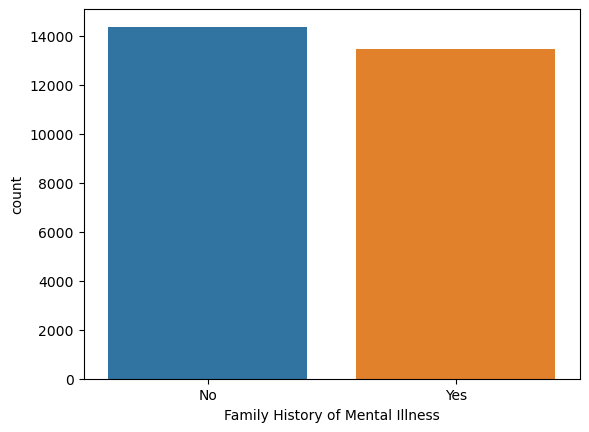

In [81]:
sns.countplot(x="Family History of Mental Illness",data=data,hue="Family History of Mental Illness")
plt.show()

 Observation -
* We have approx same no data in Family History of Mental Illness.

In [84]:
data.columns

Index(['Gender', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

* Observation-Males are highly depressed than female.

# 5.2)- Bivariate Analysis

In [88]:
data.head(2)

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0


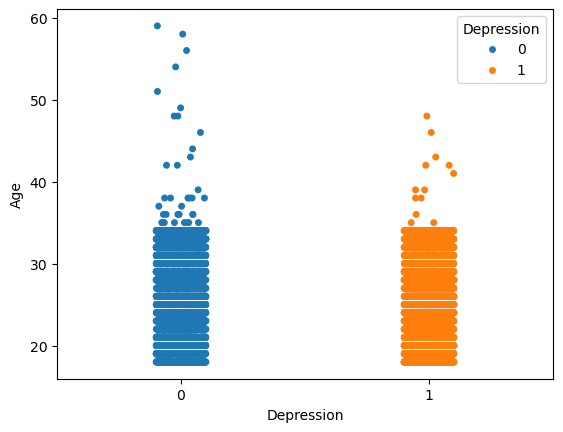

In [90]:
sns.stripplot(x="Depression",y="Age",data=data,hue="Depression")
plt.show()

* Observation
Younger people are more depressed afte the age 35 very few people are depressed.

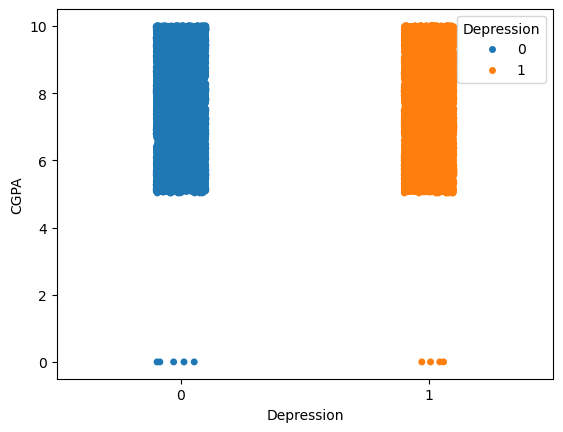

In [92]:
sns.stripplot(x="Depression",y="CGPA",data=data,hue="Depression")
plt.show()

* Observation:
More the cgpa more the depression.

In [95]:
data.head(1)

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1


In [96]:
data.head(1)

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1


#### Checking distributions of some continuous columns.

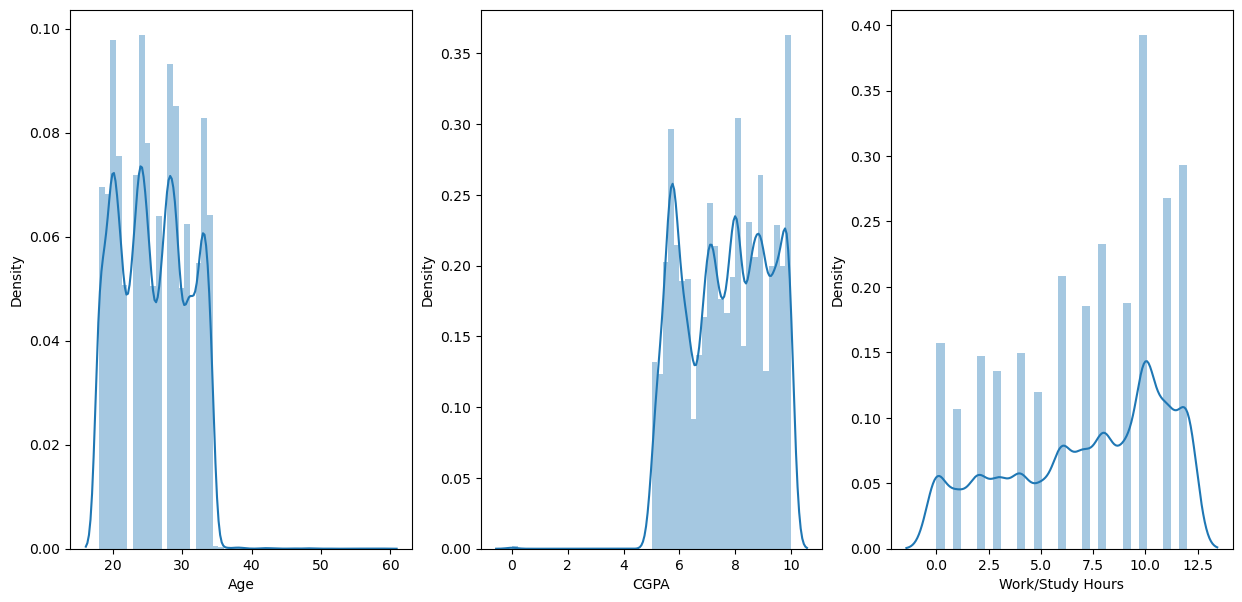

In [99]:
fig,axs=plt.subplots(1,3,figsize=(15,7))
sns.distplot(data["Age"],ax=axs[0])
sns.distplot(data["CGPA"],ax=axs[1])
sns.distplot(data["Work/Study Hours"],ax=axs[2])

plt.show()

Note:- As they are highly skewed data i will apply yeo johnson method here.

In [104]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson")
data[["Age","CGPA","Work/Study Hours"]]=pt.fit_transform(data[["Age","CGPA","Work/Study Hours"]])

#### Note :- We will use Label Encoding for binary categorical variables (Yes/No, Male/Female) since they have only two unique values.
### Ordinal encoding for dietry habits and will map some values based on columns..

#### Note:- let's deal with sleep duraion first because it is different than other categorical values.

In [107]:
data["Sleep Duration"].unique()

array(['5-6 hours', 'Less than 5 hours', '7-8 hours', 'More than 8 hours',
       'Others'], dtype=object)

In [108]:
# map the value
sleep_map={"5-6 hours":5.5,"Less than 5 hours":4.5,"7-8 hours":7.5,"More than 8 hours":8.5,"Others":(5.5+4.5+7.5+8.5)/4}

In [109]:
data["Sleep Duration"]=data["Sleep Duration"].map(sleep_map)

In [110]:
data["Sleep Duration"]

0        5.5
1        5.5
2        4.5
3        7.5
4        5.5
        ... 
27896    5.5
27897    4.5
27898    5.5
27899    4.5
27900    4.5
Name: Sleep Duration, Length: 27867, dtype: float64

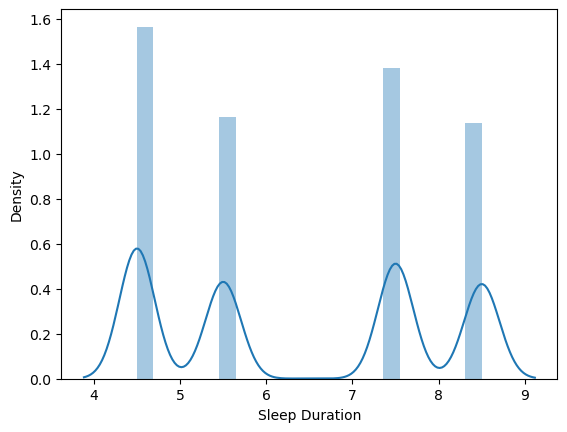

In [112]:
# lets visulise the distribution of sleep duration which we converted into average sleep duration.
sns.distplot(data["Sleep Duration"])
plt.show()

In [113]:
# As here i see multi peaks so i will apply yeo johnson here too.
data["Sleep Duration"]=pt.fit_transform(data[["Sleep Duration"]])   

#### Note:> Now let's map the degree values.

In [116]:
degree_mapping = {
    "Class 12": "School",
    "B.Pharm": "UG", "BSc": "UG", "BA": "UG", "BCA": "UG", "B.Ed": "UG", 
    "LLB": "UG", "BE": "UG", "BHM": "UG", "B.Com": "UG", "B.Arch": "UG", 
    "B.Tech": "UG", "BBA": "UG",
    "M.Tech": "PG", "PhD": "PG", "M.Ed": "PG", "MSc": "PG", "M.Pharm": "PG", 
    "MCA": "PG", "MA": "PG", "MD": "PG", "MBA": "PG", "MBBS": "PG", 
    "M.Com": "PG", "LLM": "PG", "ME": "PG", "MHM": "PG",
    "Others": "Unknown"
}

In [121]:
data["Degree"]=data["Degree"].map(degree_mapping)

#### let's convert into ordinal encoding with map.

In [126]:
ordinal_mapping = {"School": 0, "UG": 1, "PG": 2, "Unknown": -1}

In [128]:
data["Degree"]=data["Degree"].map(ordinal_mapping)

#### let's do univariate and bivariate analysis here.

In [132]:
data.head(1)

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,1.410043,5.0,0.0,0.892475,2.0,0.0,-0.484457,Healthy,1,Yes,-1.138973,1.0,No,1


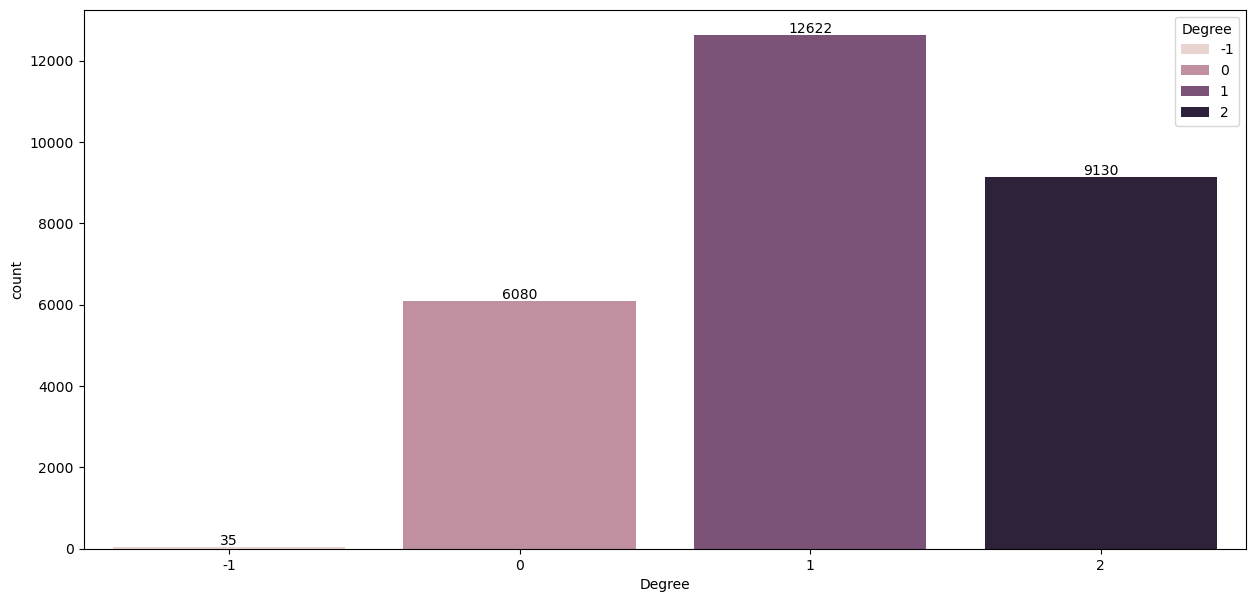

In [134]:
plt.figure(figsize=(15,7)),
ax=sns.countplot(x="Degree",data=data,hue="Degree")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Observation
* We have more students from UG.

In [137]:
# now we will calculate depression rate for differen different type of students.

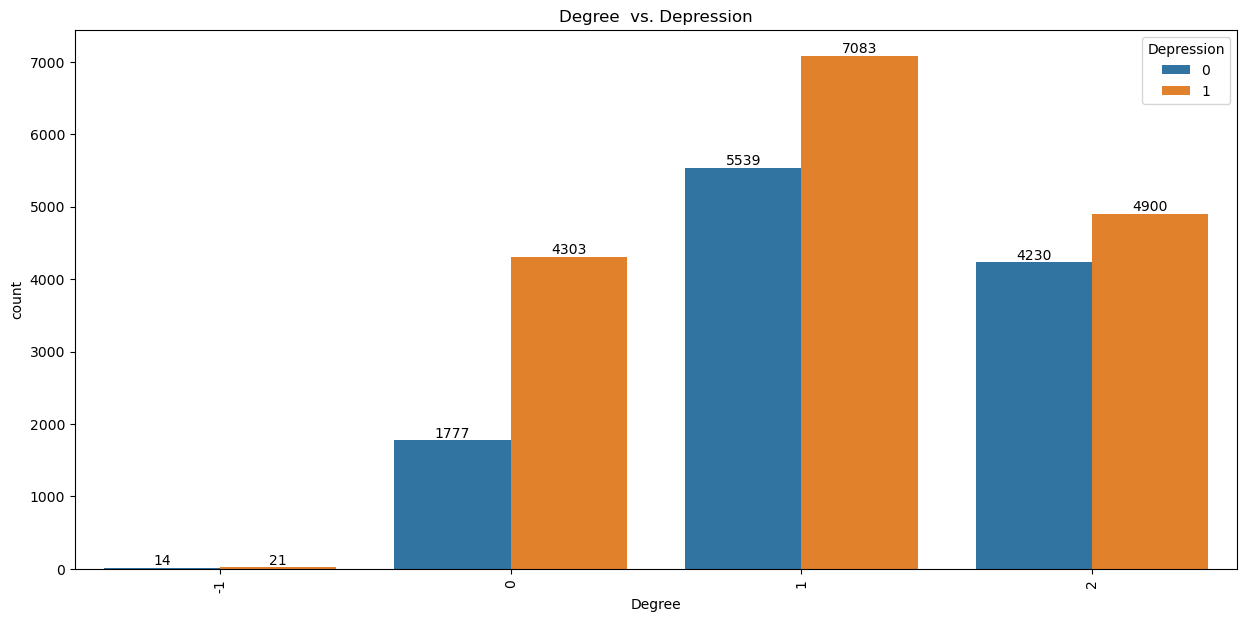

In [139]:
plt.figure(figsize=(15,7)),
ax=sns.countplot(x="Degree",data=data,hue="Depression")
for container in ax.containers:
    ax.bar_label(container)

plt.title("Degree  vs. Depression")
plt.xticks(rotation=90)
plt.show()

In [140]:
depressed_students_rate=pd.DataFrame({"School":[round((4303/6080)*100,2)],"UG":[round((7083/12622)*100,2)],"PG":[round((4900/9130)*100,2)],"Unknown":[round((21/35)*100,2)]})
depressed_students_rate

,School,UG,PG,Unknown
0,70.77,56.12,53.67,60.0


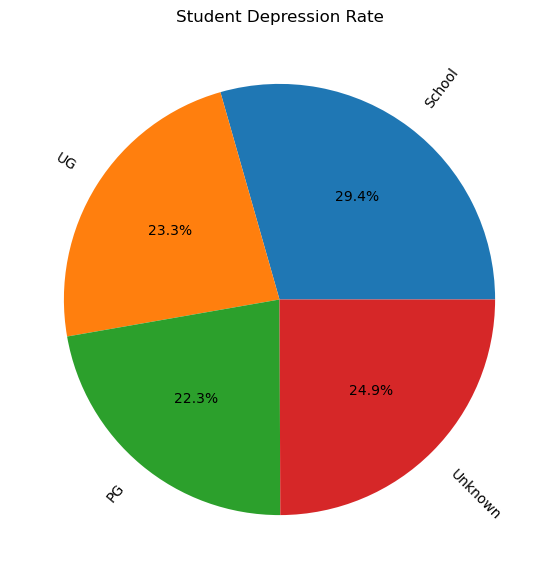

In [141]:
plt.figure(figsize=(10,7))
plt.pie(x=[70.77,56.12,53.67,60.0],labels=["School","UG","PG","Unknown"],autopct="%1.1f%%",rotatelabels=True)
plt.title("Student Depression Rate")
plt.show()

* Observation 

 As we can see depression rate is high for school students.

## Now let's encode the data using different different encoding techniques.

In [146]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
lab_enc=LabelEncoder()

In [148]:
data.head(2)

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,1.410043,5.0,0.0,0.892475,2.0,0.0,-0.484457,Healthy,1,Yes,-1.138973,1.0,No,1
1,Female,-0.323467,2.0,0.0,-1.190383,5.0,0.0,-0.484457,Moderate,1,No,-1.138973,2.0,Yes,0


In [150]:
data["Gender"]=lab_enc.fit_transform(data["Gender"])
data["Have you ever had suicidal thoughts ?"]=lab_enc.fit_transform(data["Have you ever had suicidal thoughts ?"])
data["Family History of Mental Illness"]=lab_enc.fit_transform(data["Family History of Mental Illness"])

In [152]:
data["Dietary Habits"].value_counts()

Dietary Habits
Unhealthy    10308
Moderate      9910
Healthy       7637
Others          12
Name: count, dtype: int64

In [154]:
ord_enc=OrdinalEncoder(categories=[["Others","Unhealthy","Moderate","Healthy"]])
data["Dietary Habits"]=ord_enc.fit_transform(data[["Dietary Habits"]])

In [156]:
data.head(2)

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,1.410043,5.0,0.0,0.892475,2.0,0.0,-0.484457,3.0,1,1,-1.138973,1.0,0,1
1,0,-0.323467,2.0,0.0,-1.190383,5.0,0.0,-0.484457,2.0,1,0,-1.138973,2.0,1,0


### Checking Multicolinearty 

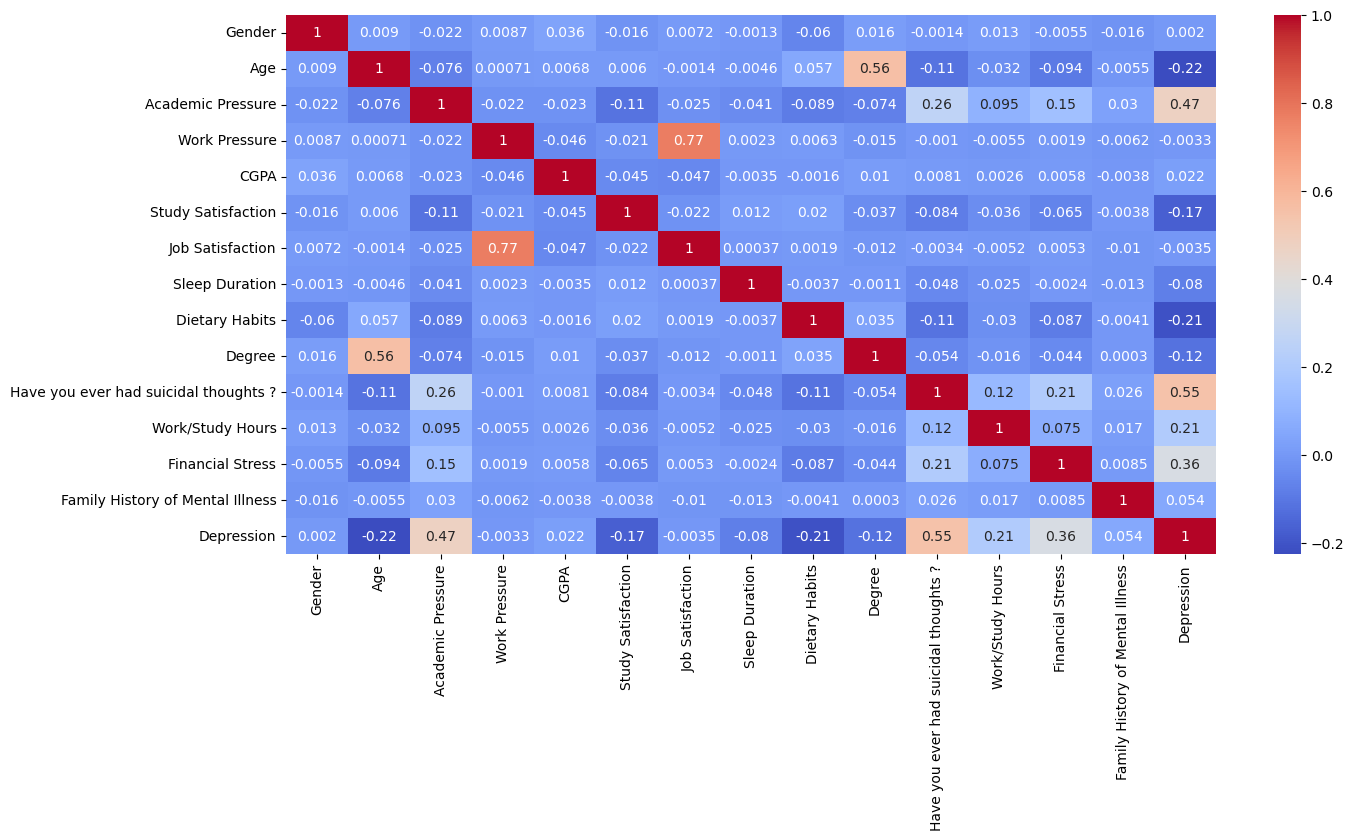

In [159]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.show()

* Observation
* As we are not seeing any high correlated b/w features score so will not drop any feature.

# Checking Data is balance or Imbalance

In [162]:
data.shape

(27867, 15)

In [163]:
data["Depression"].value_counts()

Depression
1    16307
0    11560
Name: count, dtype: int64

In [164]:
print((16335/27898)*100)
print((11563/27898)*100)

58.552584414653374
41.44741558534662


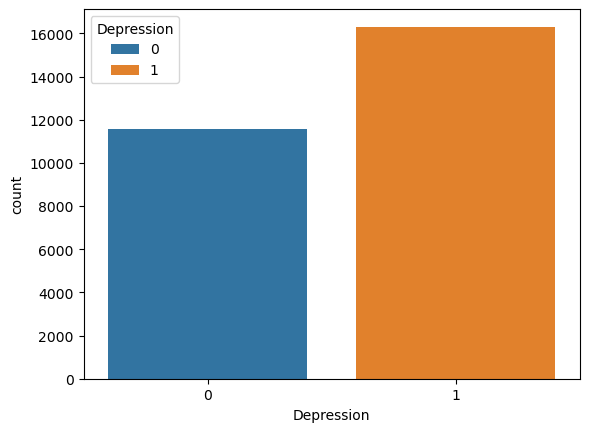

In [165]:
sns.countplot(x="Depression",data=data,hue="Depression")
plt.show()

#### Note:- We have almost balance datset.

In [172]:
data.columns

Index(['Gender', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

# 6) Split the dataset into features and target. 

In [175]:
X=data.drop(columns=["Depression"])
y=data["Depression"]

#### split into train and test

In [178]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=4)
print(x_train.shape,x_test.shape)

(20900, 14) (6967, 14)


# 7) Model Building

#### importing the models:>

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier  

#### import the all performance matrix

In [186]:
from sklearn.metrics import *

In [188]:
def evaluate_model(y_true,y_pred):
        acc_score=accuracy_score(y_true,y_pred)
        return acc_score

In [190]:
def model_train_test():


    models={"LogisticRegression":LogisticRegression(),
            "DecisionTree":DecisionTreeClassifier(),
            "RandomForest":RandomForestClassifier(),
            "SVC":SVC(),
            "AdaBoostClassifier":AdaBoostClassifier(),
           "XGBClassifier":XGBClassifier()
           }

    model_name=[]
    model_train_acc=[]
    model_test_acc=[]


    for i in range(len(list(models))):
        print(f"Training for {list(models.keys())[i]}")
        list(models.values())[i].fit(x_train,y_train)
        y_train_pred=list(models.values())[i].predict(x_train)
        y_test_pred=list(models.values())[i].predict(x_test)


        acc_score_train=evaluate_model(y_train,y_train_pred)
        acc_score_test=evaluate_model(y_test,y_test_pred)

        model_name.append(list(models.keys())[i])
        model_train_acc.append(acc_score_train)
        model_test_acc.append(acc_score_test)

    df=pd.DataFrame(list(zip(model_name,model_train_acc,model_test_acc)),columns=["Model Name","Training Accuracy","Testing Accuracy"])

    return df

ans=model_train_test()

Training for LogisticRegression
Training for DecisionTree
Training for RandomForest
Training for SVC
Training for AdaBoostClassifier
Training for XGBClassifier


In [191]:
ans

,Model Name,Training Accuracy,Testing Accuracy
0,LogisticRegression,0.848182,0.844409
1,DecisionTree,1.000000,0.764748
2,RandomForest,1.000000,0.840534
3,SVC,0.851866,0.842543
4,AdaBoostClassifier,0.849426,0.842830
5,XGBClassifier,0.920622,0.837520


In [192]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(LogisticRegression(),X,y,cv=5)
scores

array([0.84140653, 0.85163258, 0.84317244, 0.84604342, 0.85304145])

# Applying GridSearch For DecisionTreeClassifier,RandomForestClassifie,SVC,AdaBoostClassifier & XGBClassifier....

In [194]:
param_grid={"criterion":["gini","entropy"],"min_samples_split":range(4,8),"max_depth":range(6,8),"max_leaf_nodes":range(6,10)}

In [195]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(6, 8),
                         'max_leaf_nodes': range(6, 10),
                         'min_samples_split': range(4, 8)})

In [196]:
dt_best_estimator=grid_search.best_estimator_

In [197]:
y_train_pred_dt=dt_best_estimator.predict(x_train)
y_test_pred_dt=dt_best_estimator.predict(x_test)

In [198]:
evaluate_model(y_train,y_train_pred_dt)

0.8232057416267943

In [199]:
evaluate_model(y_test,y_test_pred_dt)

0.8172814697861346

In [200]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(RandomForestClassifier(),param_grid=param_grid,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(6, 8),
                         'max_leaf_nodes': range(6, 10),
                         'min_samples_split': range(4, 8)})

In [201]:
rf_best_estimator=grid_search.best_estimator_

In [202]:
y_train_pred_rf=rf_best_estimator.predict(x_train)
y_test_pred_rf=rf_best_estimator.predict(x_test)

In [203]:
evaluate_model(y_train,y_train_pred_rf)

0.8283732057416268

In [204]:
evaluate_model(y_test,y_test_pred_rf)

0.8204392134347639

In [205]:
param_grid={"C":[1,5,10,20],
           "gamma":[0.001,0.01,0.02]}

In [206]:
grid_search=GridSearchCV(SVC(),param_grid=param_grid,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20], 'gamma': [0.001, 0.01, 0.02]})

In [207]:
svc_best_estimator=grid_search.best_estimator_

In [208]:
y_train_pred_svc=svc_best_estimator.predict(x_train)
y_test_pred_svc=svc_best_estimator.predict(x_test)

In [209]:
evaluate_model(y_train,y_train_pred_svc)

0.8494258373205742

In [210]:
evaluate_model(y_train,y_train_pred_svc )

0.8494258373205742

In [211]:
param_grid = {
    "n_estimators": [50, 100, 200],  
    "learning_rate": [0.01, 0.1, 0.5, 1.0], 
    "algorithm": ["SAMME", "SAMME.R"] 
}

In [212]:
grid_search=GridSearchCV(AdaBoostClassifier(),param_grid=param_grid,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]})

In [213]:
adaboost_best_estimator=grid_search.best_estimator_

In [214]:
y_train_pred_svc=svc_best_estimator.predict(x_train)
y_test_pred_svc=svc_best_estimator.predict(x_test)

In [215]:
evaluate_model(y_train,y_train_pred_svc)

0.8494258373205742

In [216]:
evaluate_model(y_train,y_train_pred_svc )

0.8494258373205742

In [219]:
param_grid = {
    "max_depth": range(3, 10),  
    "min_child_weight": range(1, 6),  
    "learning_rate": [0.01, 0.1, 0.2], 
    "n_estimators": [100,150]  
}

In [220]:
grid_search=GridSearchCV(XGBClassifier(),param_grid=param_grid,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': range(3, 10),
                         'min_child_weight': range(1, 6),
                         'n_estimators': [100, 150]})

In [221]:
xg_best_estimator=grid_search.best_estimator_

In [222]:
y_train_pred_xg=xg_best_estimator.predict(x_train)
y_test_pred_xg=xg_best_estimator.predict(x_test)

In [223]:
evaluate_model(y_train,y_train_pred_xg)

0.855311004784689

In [224]:
evaluate_model(y_test,y_test_pred_xg)

0.8442658246016937

In [273]:
 fina_train_and_test_acc_df=pd.DataFrame({"model":["LogisticRegression","DecisionTreeClassifier","RandomForestClassifier","SVC","AdaBoostClassifier","XGBClassifier"],
                           "Training Accuracy":[.848,.823,.828,.849,.849,.855],"Testing Accuracy":[.844,.817,.820,.849,.849,.844]})
fina_train_and_test_acc_df

,model,Training Accuracy,Testing Accuracy
0,LogisticRegression,0.848,0.844
1,DecisionTreeClassifier,0.823,0.817
2,RandomForestClassifier,0.828,0.820
3,SVC,0.849,0.849
4,AdaBoostClassifier,0.849,0.849
5,XGBClassifier,0.855,0.844


# Note:- All our model are giving good accuracy but SVC and AdaBoostClassifier are the best among all so will select this model.

#### I am selecting the SVC.

In [228]:
confusion_matrix(y_test,y_test_pred_svc)

array([[2274,  649],
       [ 440, 3604]], dtype=int64)

In [229]:
# Saving the model
import joblib
joblib.dump(SVC(),"Student_depression_predictor_svc.pkl")

['Student_depression_predictor_svc.pkl']

### 📌 Conclusion  

1️⃣ **Performed EDA** and extracted useful insights from the dataset.  
2️⃣ **Mapped & Encoded the Data** to convert categorical features into numerical values.  
3️⃣ **Applied PowerTransformer** to normalize numerical features for better model performance.  
4️⃣ **Built Multiple Models**, including **Logistic Regression, Decision Tree, Random Forest, AdaBoost, and XGBoost**.  
5️⃣ **Applied Hyperparameter Tuning** to optimize the models and improve accuracy.  
6️⃣ **Selected the Final Model** based on evaluation metrics, ensuring the best performance on the test data.  

In [271]:
import pandas as pd